Task 01:What I did was to see if the starting point was accurate. Your task is to check the Half-life of an cyclone and also the landfall.

In [1]:
import xarray as xr
import dask

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point
from matplotlib import animation
from tqdm.auto import tqdm
from datetime import datetime,timedelta

In [1]:
file_path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_TCBOB/Data/Preprocessed data/filtered_all_cyclone[4th august 2023].csv'
pre_data=pd.read_csv(file_path)

NameError: name 'pd' is not defined

In [3]:
pre_data

cyclone_no                 Date    lat    lon         eye      eye.1  \
0              1  1979-05-07 22:00:00   6.75  86.50   95.660950  97.736984   
1              1  1979-05-07 23:00:00   6.75  86.25   93.597015  97.013519   
2              1  1979-05-08 00:00:00   6.75  86.25   96.556213  92.251709   
3              1  1979-05-08 01:00:00   6.75  86.00   98.818558  98.317696   
4              1  1979-05-08 02:00:00   6.75  86.00  100.057404  97.221611   
...          ...                  ...    ...    ...         ...        ...   
3781          49  2020-05-20 10:00:00  21.50  88.00  101.143356  97.755447   
3782          49  2020-05-20 11:00:00  21.75  88.25  100.676369  95.485931   
3783          49  2020-05-20 12:00:00  22.00  88.25  100.126091  91.098595   
3784          49  2020-05-20 13:00:00  22.25  88.25  101.419983  89.391251   
3785          49  2020-05-20 14:00:00  22.50  88.25  104.923904  89.879066   

          eye.2     eye.3     eye.4     eye.5  ...  rquv grid.2800  \
0     95.491577  0.000016  0.005992  0.014564  ...      302.293976   
1     92.399307  0.000016  0.005942  0.014518  ...      302.293976   
2     94.831024  0.000015  0.005842  0.014695  ...      302.293976   
3     94.402756  0.000016  0.005979  0.014798  ...      302.293976   
4     92.912262  0.000016  0.006008  0.014700  ...      302.293976   
...         ...       ...       ...       ...  ...             ...   
3781  90.524521  0.000051  0.008797  0.017035  ...      302.579834   
3782  90.572113  0.000050  0.008171  0.016890  ...      302.579834   
3783  93.382980  0.000049  0.007944  0.017346  ...      302.579834   
3784  94.638206  0.000048  0.007829  0.016972  ...      302.579834   
3785  95.363976  0.000048  0.007713  0.016826  ...      302.579834   

      rquv grid.2801  rquv grid.2802  rquv grid.2803  rquv grid.2804  \
0         302.067444      302.128967      302.358368      302.762665   
1         302.067444      302.128967      302.358368      302.762665   
2         302.067444      302.128967      302.358368      302.762665   
3         302.067444      302.128967      302.358368      302.762665   
4         302.067444      302.128967      302.358368      302.762665   
...              ...             ...             ...             ...   
3781      302.588623      302.683289      302.565247      302.612030   
3782      302.588623      302.683289      302.565247      302.612030   
3783      302.588623      302.683289      302.565247      302.612030   
3784      302.588623      302.683289      302.565247      302.612030   
3785      302.588623      302.683289      302.565247      302.612030   

      rquv grid.2805  rquv grid.2806  rquv grid.2807  lat+6  lon+6  
0         302.859283      302.898346             NaN   6.75  86.00  
1         302.859283      302.898346             NaN   6.75  86.00  
2         302.859283      302.898346             NaN   6.75  86.00  
3         302.859283      302.898346             NaN   6.75  86.00  
4         302.859283      302.898346             NaN   6.75  86.00  
...              ...             ...             ...    ...    ...  
3781      302.591644      302.658813             NaN  22.75  88.25  
3782      302.591644      302.658813             NaN  23.00  88.50  
3783      302.591644      302.658813             NaN  23.25  88.50  
3784      302.591644      302.658813             NaN  23.25  88.50  
3785      302.591644      302.658813             NaN  23.50  88.50  

[3786 rows x 2826 columns]

In [4]:
column_name_mapping = {
    'cyclone_no': 'NUMBER',
    'Date': 'ISO_TIME'
}

# Use the rename method to rename the columns
pre_data.rename(columns=column_name_mapping, inplace=True)
pre_data

NUMBER             ISO_TIME    lat    lon         eye      eye.1  \
0          1  1979-05-07 22:00:00   6.75  86.50   95.660950  97.736984   
1          1  1979-05-07 23:00:00   6.75  86.25   93.597015  97.013519   
2          1  1979-05-08 00:00:00   6.75  86.25   96.556213  92.251709   
3          1  1979-05-08 01:00:00   6.75  86.00   98.818558  98.317696   
4          1  1979-05-08 02:00:00   6.75  86.00  100.057404  97.221611   
...      ...                  ...    ...    ...         ...        ...   
3781      49  2020-05-20 10:00:00  21.50  88.00  101.143356  97.755447   
3782      49  2020-05-20 11:00:00  21.75  88.25  100.676369  95.485931   
3783      49  2020-05-20 12:00:00  22.00  88.25  100.126091  91.098595   
3784      49  2020-05-20 13:00:00  22.25  88.25  101.419983  89.391251   
3785      49  2020-05-20 14:00:00  22.50  88.25  104.923904  89.879066   

          eye.2     eye.3     eye.4     eye.5  ...  rquv grid.2800  \
0     95.491577  0.000016  0.005992  0.014564  ...      302.293976   
1     92.399307  0.000016  0.005942  0.014518  ...      302.293976   
2     94.831024  0.000015  0.005842  0.014695  ...      302.293976   
3     94.402756  0.000016  0.005979  0.014798  ...      302.293976   
4     92.912262  0.000016  0.006008  0.014700  ...      302.293976   
...         ...       ...       ...       ...  ...             ...   
3781  90.524521  0.000051  0.008797  0.017035  ...      302.579834   
3782  90.572113  0.000050  0.008171  0.016890  ...      302.579834   
3783  93.382980  0.000049  0.007944  0.017346  ...      302.579834   
3784  94.638206  0.000048  0.007829  0.016972  ...      302.579834   
3785  95.363976  0.000048  0.007713  0.016826  ...      302.579834   

      rquv grid.2801  rquv grid.2802  rquv grid.2803  rquv grid.2804  \
0         302.067444      302.128967      302.358368      302.762665   
1         302.067444      302.128967      302.358368      302.762665   
2         302.067444      302.128967      302.358368      302.762665   
3         302.067444      302.128967      302.358368      302.762665   
4         302.067444      302.128967      302.358368      302.762665   
...              ...             ...             ...             ...   
3781      302.588623      302.683289      302.565247      302.612030   
3782      302.588623      302.683289      302.565247      302.612030   
3783      302.588623      302.683289      302.565247      302.612030   
3784      302.588623      302.683289      302.565247      302.612030   
3785      302.588623      302.683289      302.565247      302.612030   

      rquv grid.2805  rquv grid.2806  rquv grid.2807  lat+6  lon+6  
0         302.859283      302.898346             NaN   6.75  86.00  
1         302.859283      302.898346             NaN   6.75  86.00  
2         302.859283      302.898346             NaN   6.75  86.00  
3         302.859283      302.898346             NaN   6.75  86.00  
4         302.859283      302.898346             NaN   6.75  86.00  
...              ...             ...             ...    ...    ...  
3781      302.591644      302.658813             NaN  22.75  88.25  
3782      302.591644      302.658813             NaN  23.00  88.50  
3783      302.591644      302.658813             NaN  23.25  88.50  
3784      302.591644      302.658813             NaN  23.25  88.50  
3785      302.591644      302.658813             NaN  23.50  88.50  

[3786 rows x 2826 columns]

In [5]:
sin_cyc = pre_data[pre_data['NUMBER'] ==1]
cyclone = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']]
cyclone.head()

NUMBER             ISO_TIME   lat    lon
0       1  1979-05-07 22:00:00  6.75  86.50
1       1  1979-05-07 23:00:00  6.75  86.25
2       1  1979-05-08 00:00:00  6.75  86.25
3       1  1979-05-08 01:00:00  6.75  86.00
4       1  1979-05-08 02:00:00  6.75  86.00

In [6]:
cyclone.ISO_TIME[0][:4]

'1979'

# Working with slp 

In [7]:
slp_data= xr.open_mfdataset('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_TCBOB/Data/Era5_SLP_1978-2021/*.nc')
# slp_data = slp_data.sel(time=slice(str(1978), str(2006)))
slp_data

<xarray.Dataset>
Dimensions:    (longitude: 89, latitude: 101, time: 385704)
Coordinates:
  * longitude  (longitude) float32 78.0 78.25 78.5 78.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1978-01-01 ... 2021-12-31T23:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 101, 89), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-28 20:05:25 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [2]:
slp_data.msl[0,:,:].plot()


NameError: name 'slp_data' is not defined

In [9]:
# selecting variable for lat lon and time
lon = slp_data['longitude'][:]
lat = slp_data['latitude'][:]
time = slp_data['time'][:]

#converting lon lat in lon2d and lat2d
lon2d, lat2d = np.meshgrid(lon, lat)

In [10]:
# # Taking the cyclone number from input
# # This sricpt was in part by part

# # Selecting the cyclone number to be displayed
# cyclone_number = 58
# sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
# cyclone = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()

# cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

# # Date problem solved by conversion
# target_date = cyclone_data.ISO_TIME[0]
# target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")
# slp_time = []
# for i in range(len(slp_data.time)):
#     slp_time.append(str(slp_data.time[i])[36:49])
# # Find the index of the target date
# index = slp_time.index(target_cyclone_date)

# # plotting
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax.plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=5, color='white', transform=ccrs.PlateCarree())
# ax.set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
# ax.coastlines(linewidth=1.4)
# # ax.gridlines(draw_labels=True)

# levels=np.arange(100400, 102100, 100)
# ax.contourf(lon2d, lat2d, slp_data.msl[index,:,:], levels =levels, cmap='rainbow', extend='both', transform=ccrs.PlateCarree())

# contourf = ax.contourf(lon2d, lat2d, slp_data.msl[index,:,:], levels =levels, cmap='rainbow', extend='both', transform=ccrs.PlateCarree())

# # Add colorbar
# cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.05, fraction=0.03)
# cbar.set_label('Pressure (hPa)')  # You can customize the label

# plt.title('SLP with Cyclone 1')
# plt.show()

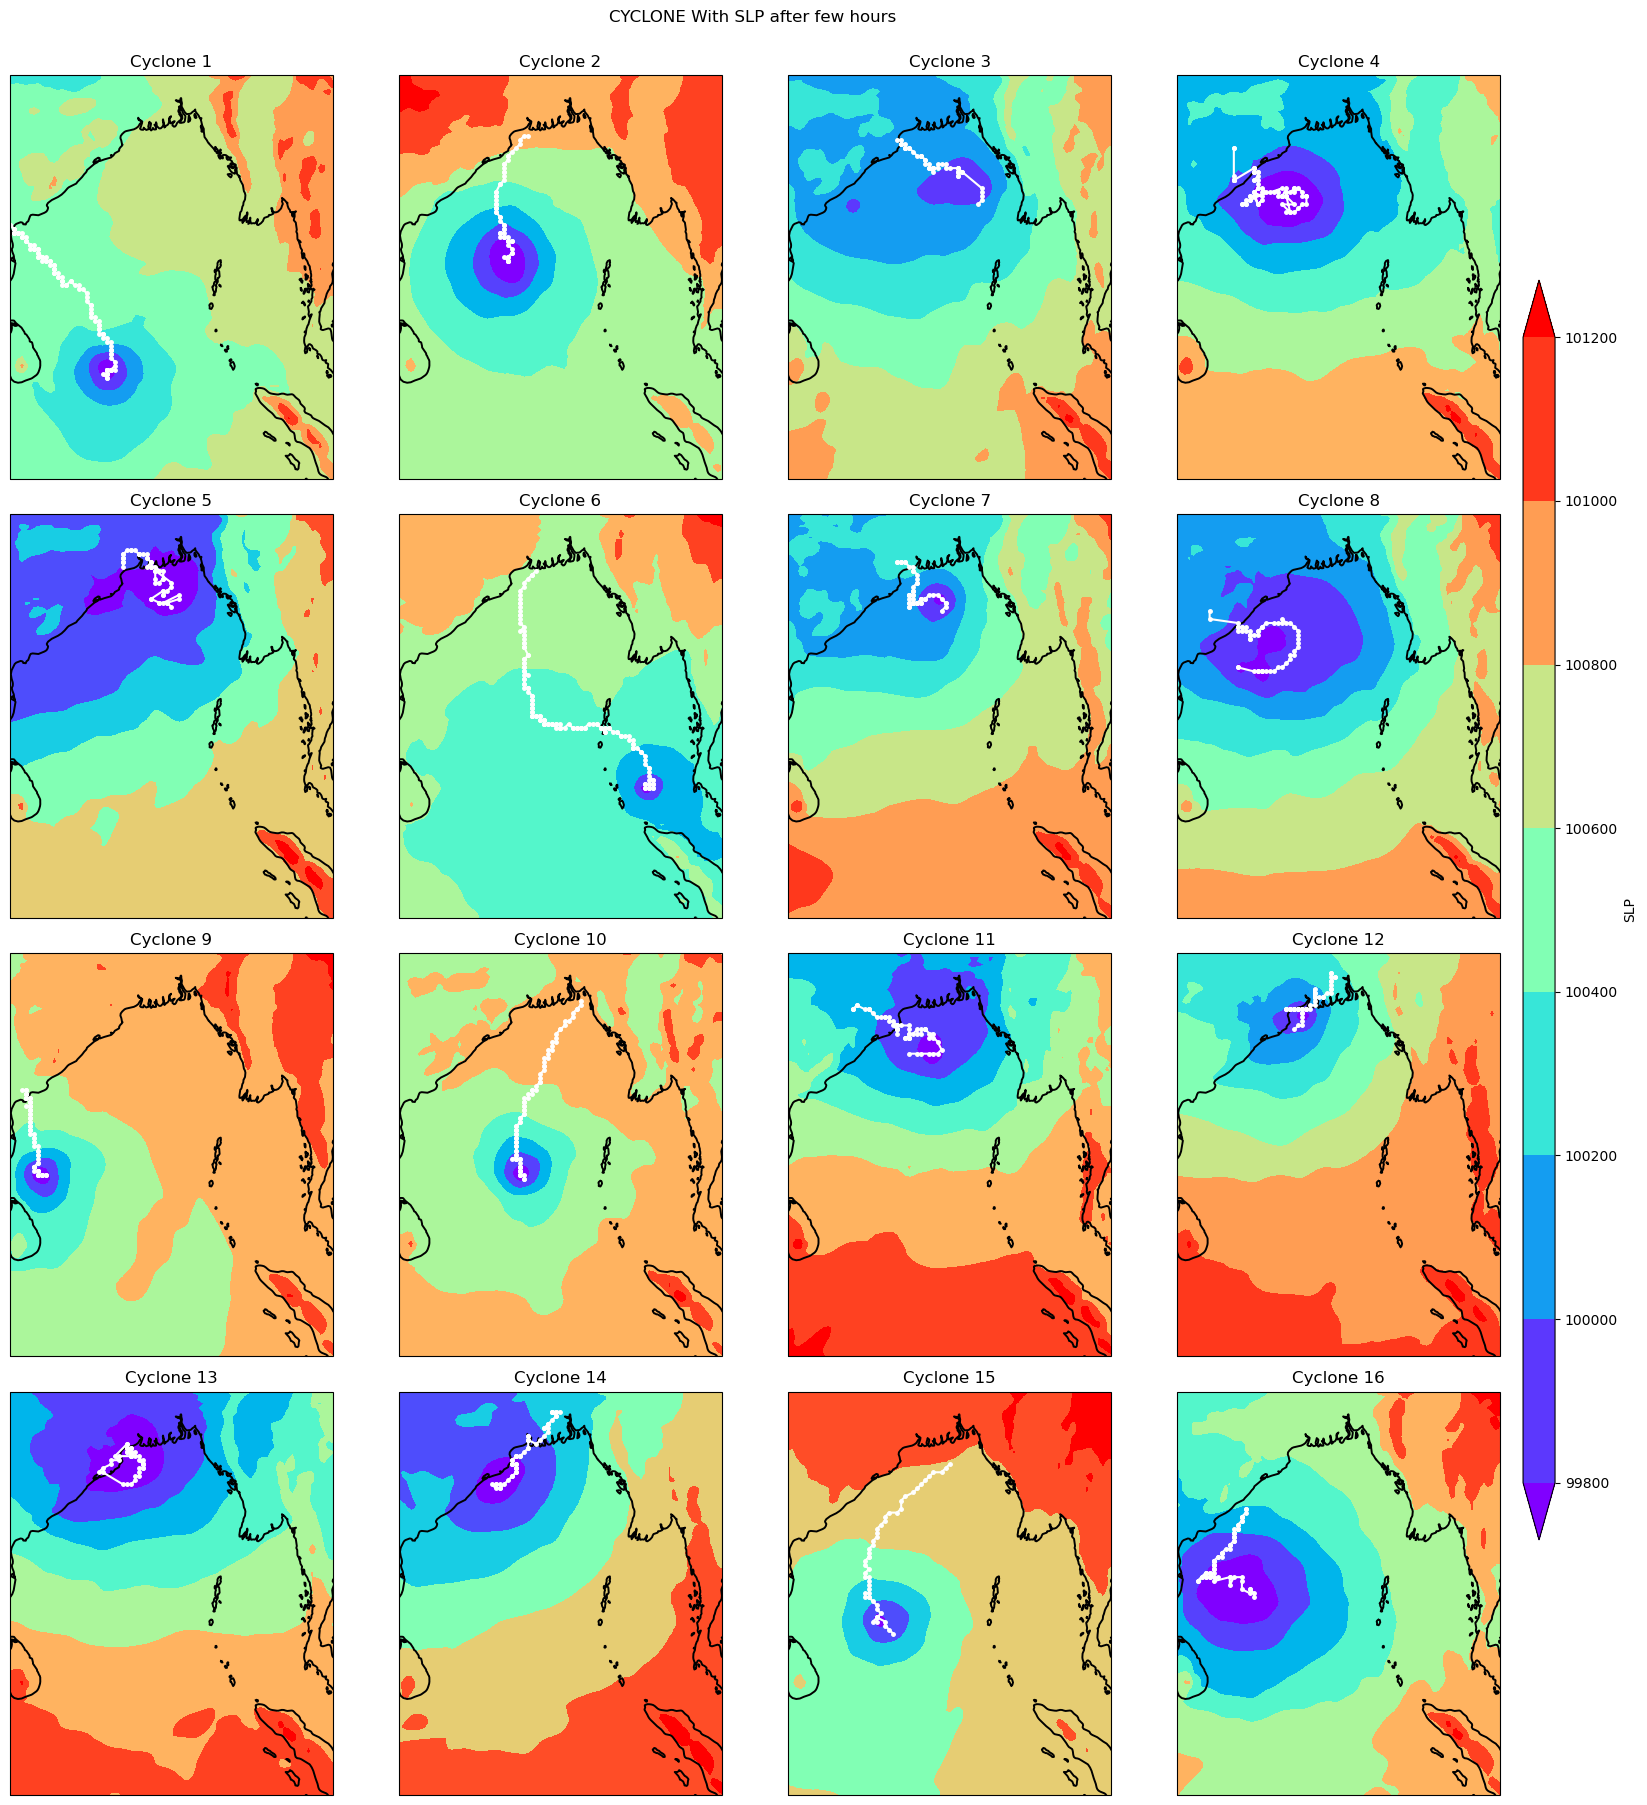

In [11]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(4, 4, figsize=(16, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(4):
    for j in range(4):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[4] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("CYCLONE With SLP after few hours ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()


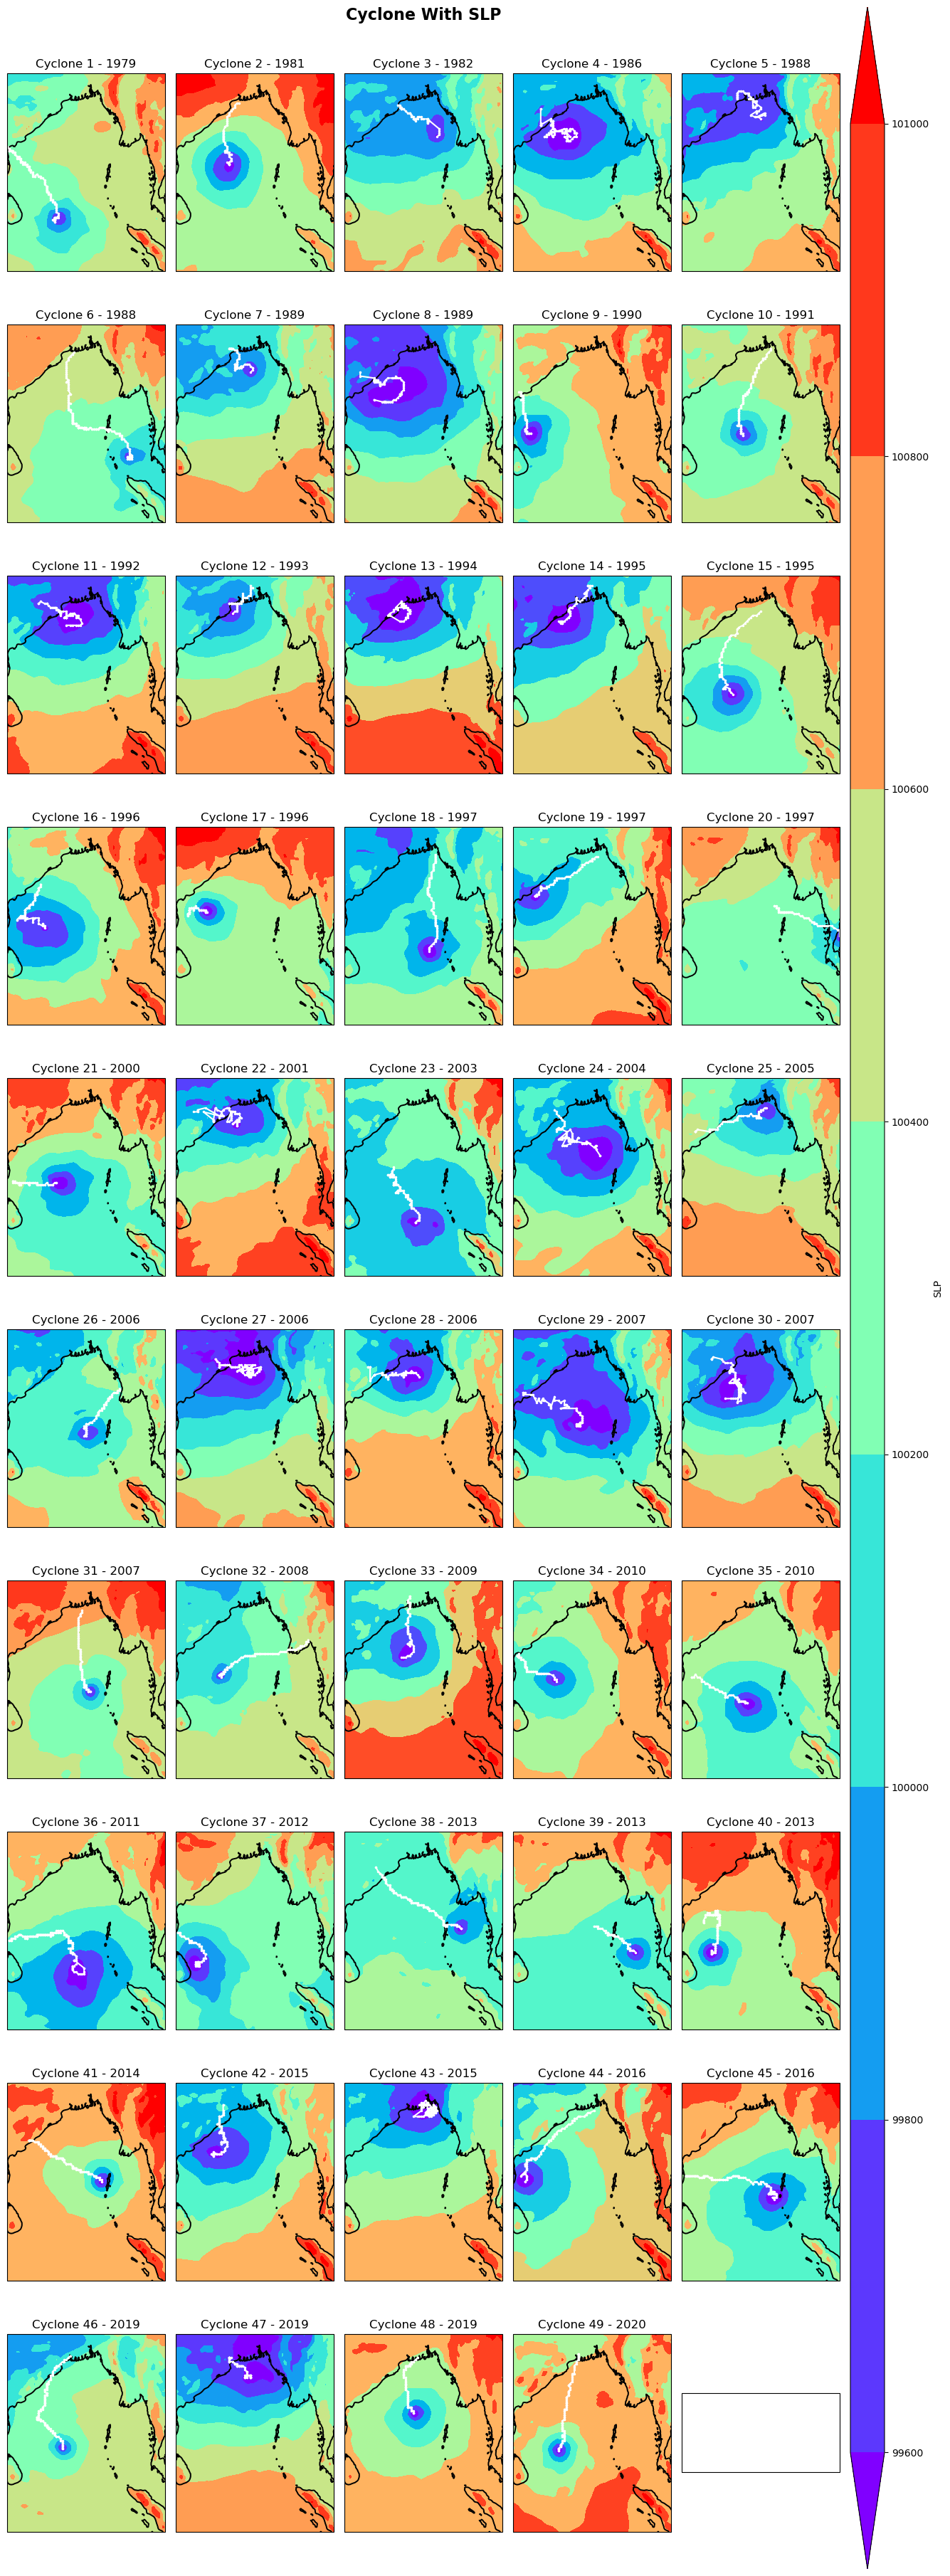

In [12]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

cyclone_number = 0

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = cyclone_number+1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]
        if not cyclone_data.empty:
            # Date problem solved by conversion
            target_date = cyclone_data.ISO_TIME[0]
            target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

            index = slp_time.index(target_cyclone_date)


            # plotting
            axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=1.5, color='white', transform=ccrs.PlateCarree())
            axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
            axs[i,j].coastlines(linewidth=1.4)
            axs[i,j].set_title(f"Cyclone {cyclone_number} - {cyclone_data.ISO_TIME[0][:4]}")
            # ax.gridlines(draw_labels=True)

            # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            # Create the contourf plot
            contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04, 1])  # Define the position of the colorbar [left, bottom, width, height][1, 0, 0.03, 1])

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("Cyclone With SLP", fontsize=16, fontweight='bold', y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

# Get a specific cyclone


In [14]:
# sanjid

In [15]:
# grouped = pre_data.groupby('NUMBER')
# specific_group = grouped.get_group(20)
# specific_group.head(20)

In [16]:

# cyclone =specific_group[['NUMBER', 'ISO_TIME', 'lat', 'lon']]
# cyclone=cyclone.reset_index(drop=True)

In [17]:
# cyclone.ISO_TIME[4]

# Count the number of hours.

In [18]:
# num=math.ceil(cyclone.shape[0]/2)

In [19]:
import math

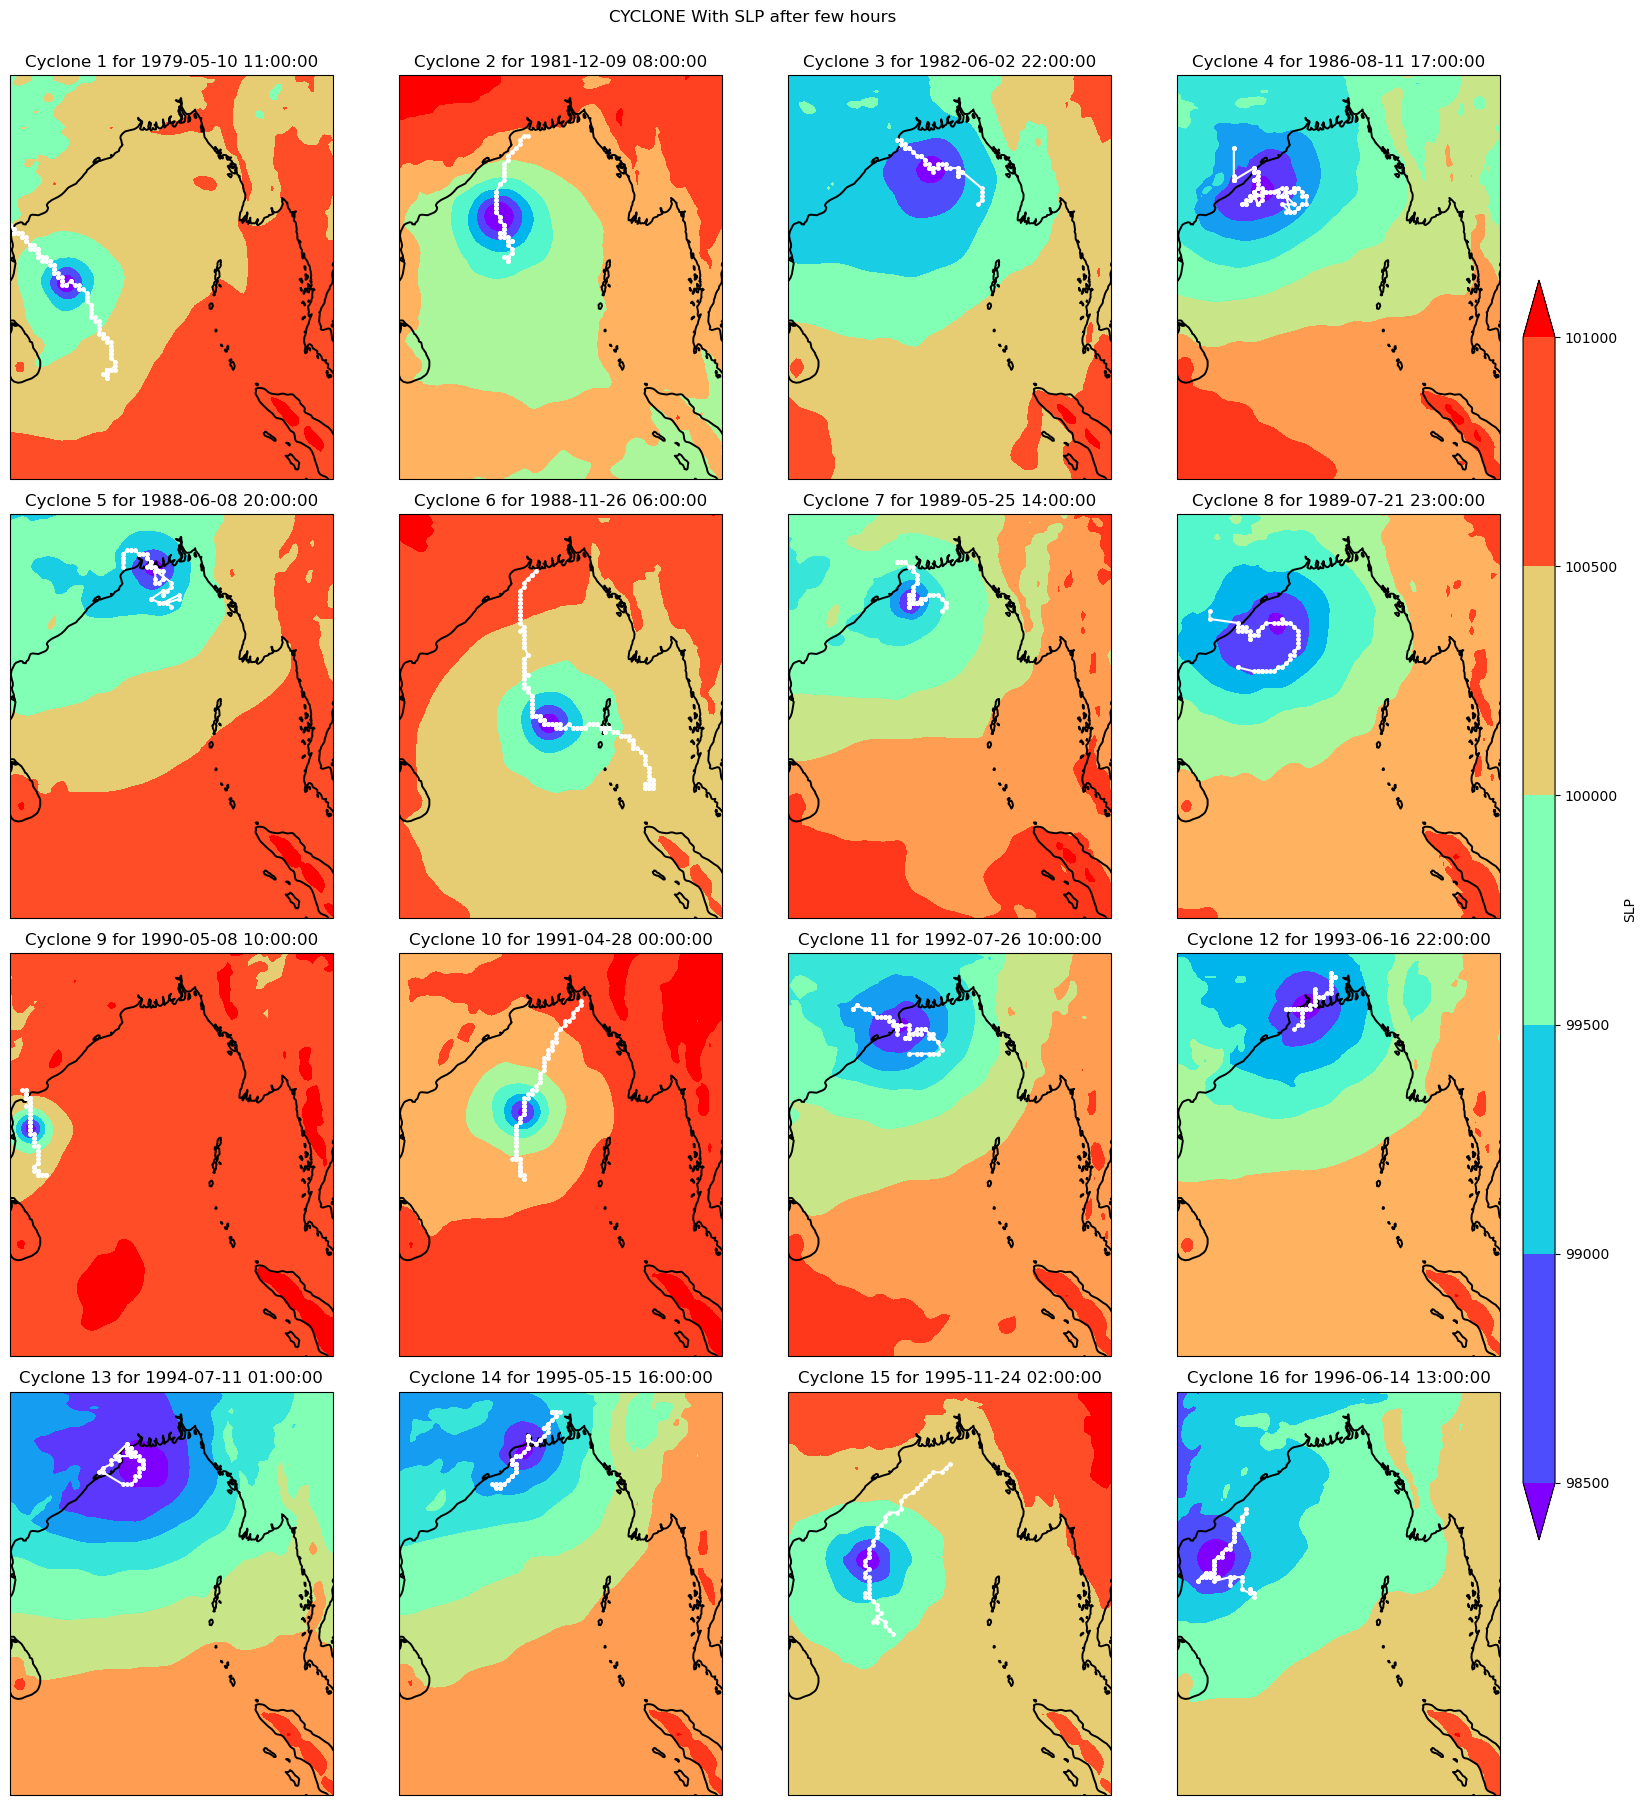

In [20]:
# Half-time plot.



slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(4, 4, figsize=(16, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(4):
    for j in range(4):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=math.ceil(cyclone_data.shape[0]/2)

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[num] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number} for {target_date}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("CYCLONE With SLP after few hours ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

In [21]:
grouped = pre_data.groupby('NUMBER')
specific_group = grouped.get_group(10).reset_index()
specific_group

index  NUMBER             ISO_TIME    lat    lon         eye      eye.1  \
0     727      10  1991-04-26 02:00:00  11.00  87.75   97.914604  95.309837   
1     728      10  1991-04-26 03:00:00  11.00  87.75   98.026665  97.882233   
2     729      10  1991-04-26 04:00:00  11.25  87.75  100.464592  95.180344   
3     730      10  1991-04-26 05:00:00  11.25  87.50  101.236557  97.685509   
4     731      10  1991-04-26 06:00:00  11.25  87.50   99.700089  93.098526   
..    ...     ...                  ...    ...    ...         ...        ...   
86    813      10  1991-04-29 16:00:00  21.25  90.75   48.077873  91.203468   
87    814      10  1991-04-29 17:00:00  21.50  91.00   51.213058  91.788673   
88    815      10  1991-04-29 18:00:00  21.50  91.00   39.601173  78.416199   
89    816      10  1991-04-29 19:00:00  21.75  91.25   93.315170  76.239746   
90    817      10  1991-04-29 20:00:00  22.00  91.25   69.608299  74.352165   

        eye.2     eye.3     eye.4  ...  rquv grid.2800  rquv grid.2801  \
0   93.661316  0.000018  0.006372  ...      303.509735      303.173920   
1   93.345055  0.000017  0.006492  ...      303.509735      303.173920   
2   89.993225  0.000018  0.006524  ...      303.509735      303.173920   
3   93.947693  0.000020  0.006543  ...      303.509735      303.173920   
4   87.874046  0.000021  0.006302  ...      303.509735      303.173920   
..        ...       ...       ...  ...             ...             ...   
86  72.798271  0.000023  0.007233  ...      303.435120      303.031799   
87  77.636765  0.000021  0.007064  ...      303.435120      303.031799   
88  75.146545  0.000015  0.006691  ...      303.435120      303.031799   
89  78.839539  0.000036  0.006616  ...      303.435120      303.031799   
90  87.814285  0.000028  0.006789  ...      303.435120      303.031799   

    rquv grid.2802  rquv grid.2803  rquv grid.2804  rquv grid.2805  \
0       303.113312      302.674896      302.900421      302.945312   
1       303.113312      302.674896      302.900421      302.945312   
2       303.113312      302.674896      302.900421      302.945312   
3       303.113312      302.674896      302.900421      302.945312   
4       303.113312      302.674896      302.900421      302.945312   
..             ...             ...             ...             ...   
86      303.034668      302.817963      302.729950      302.967377   
87      303.034668      302.817963      302.729950      302.967377   
88      303.034668      302.817963      302.729950      302.967377   
89      303.034668      302.817963      302.729950      302.967377   
90      303.034668      302.817963      302.729950      302.967377   

    rquv grid.2806  rquv grid.2807  lat+6  lon+6  
0       302.773468             NaN  11.50  87.50  
1       302.773468             NaN  11.50  87.50  
2       302.773468             NaN  11.50  87.50  
3       302.773468             NaN  11.50  87.50  
4       302.773468             NaN  11.75  87.50  
..             ...             ...    ...    ...  
86      302.721130             NaN  22.50  91.75  
87      302.721130             NaN  22.75  92.00  
88      302.721130             NaN  23.00  92.25  
89      302.721130             NaN  23.25  92.25  
90      302.721130             NaN  23.50  92.50  

[91 rows x 2827 columns]

In [22]:
math.ceil(specific_group.shape[0])

91

In [23]:
specific_group.ISO_TIME[specific_group.shape[0]-1]

'1991-04-29 20:00:00'

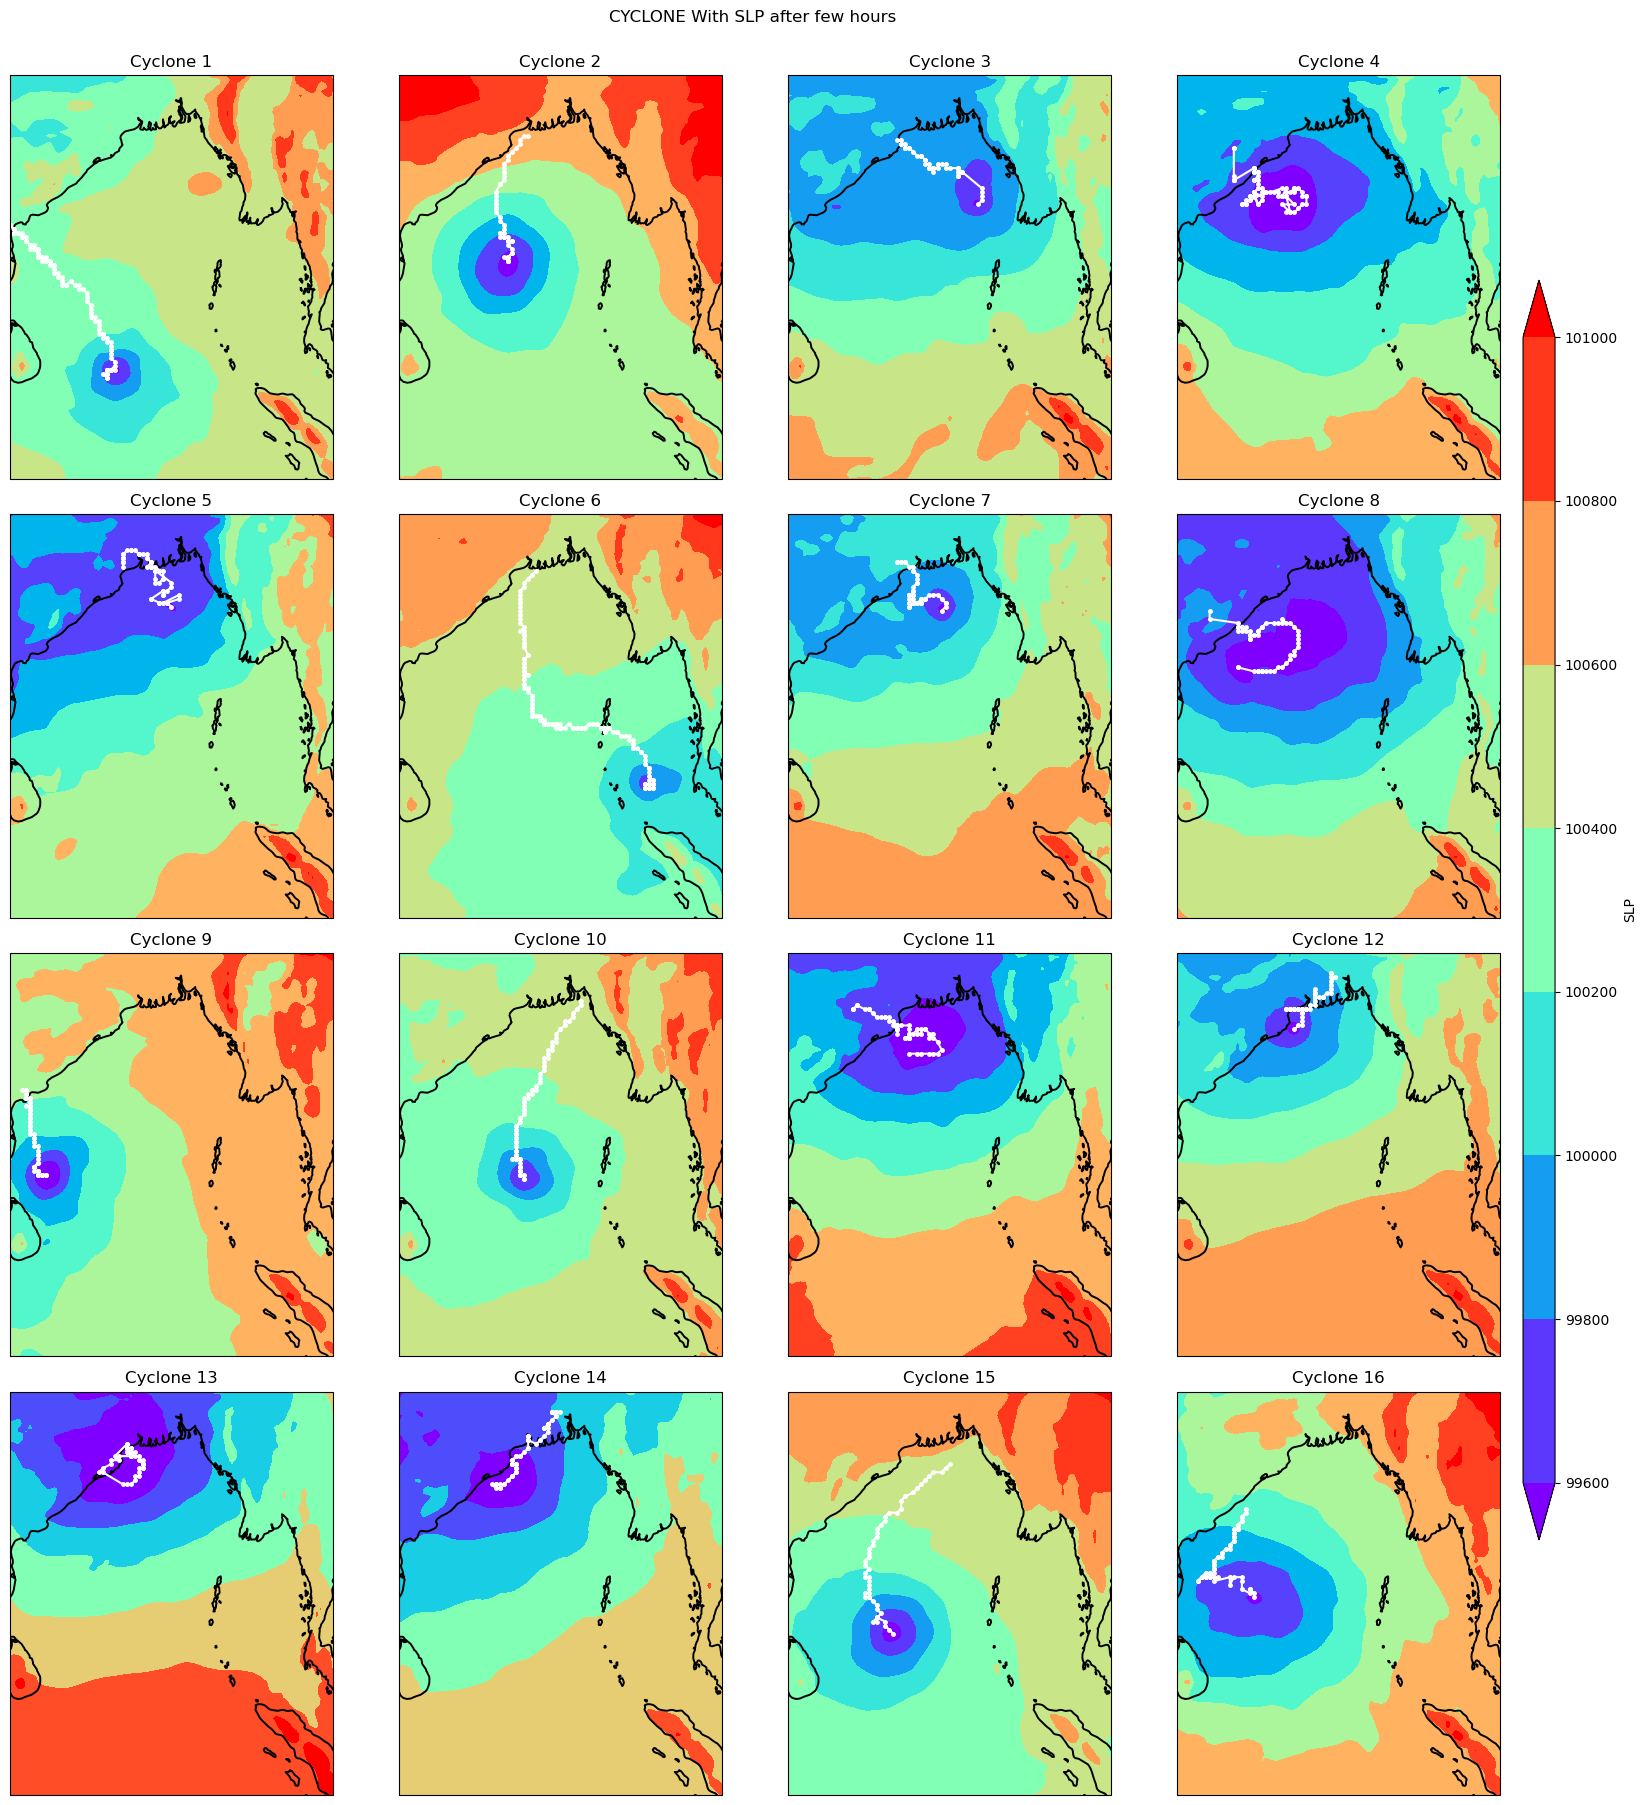

In [24]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(4, 4, figsize=(16, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(4):
    for j in range(4):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[0] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("CYCLONE With SLP after few hours ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()


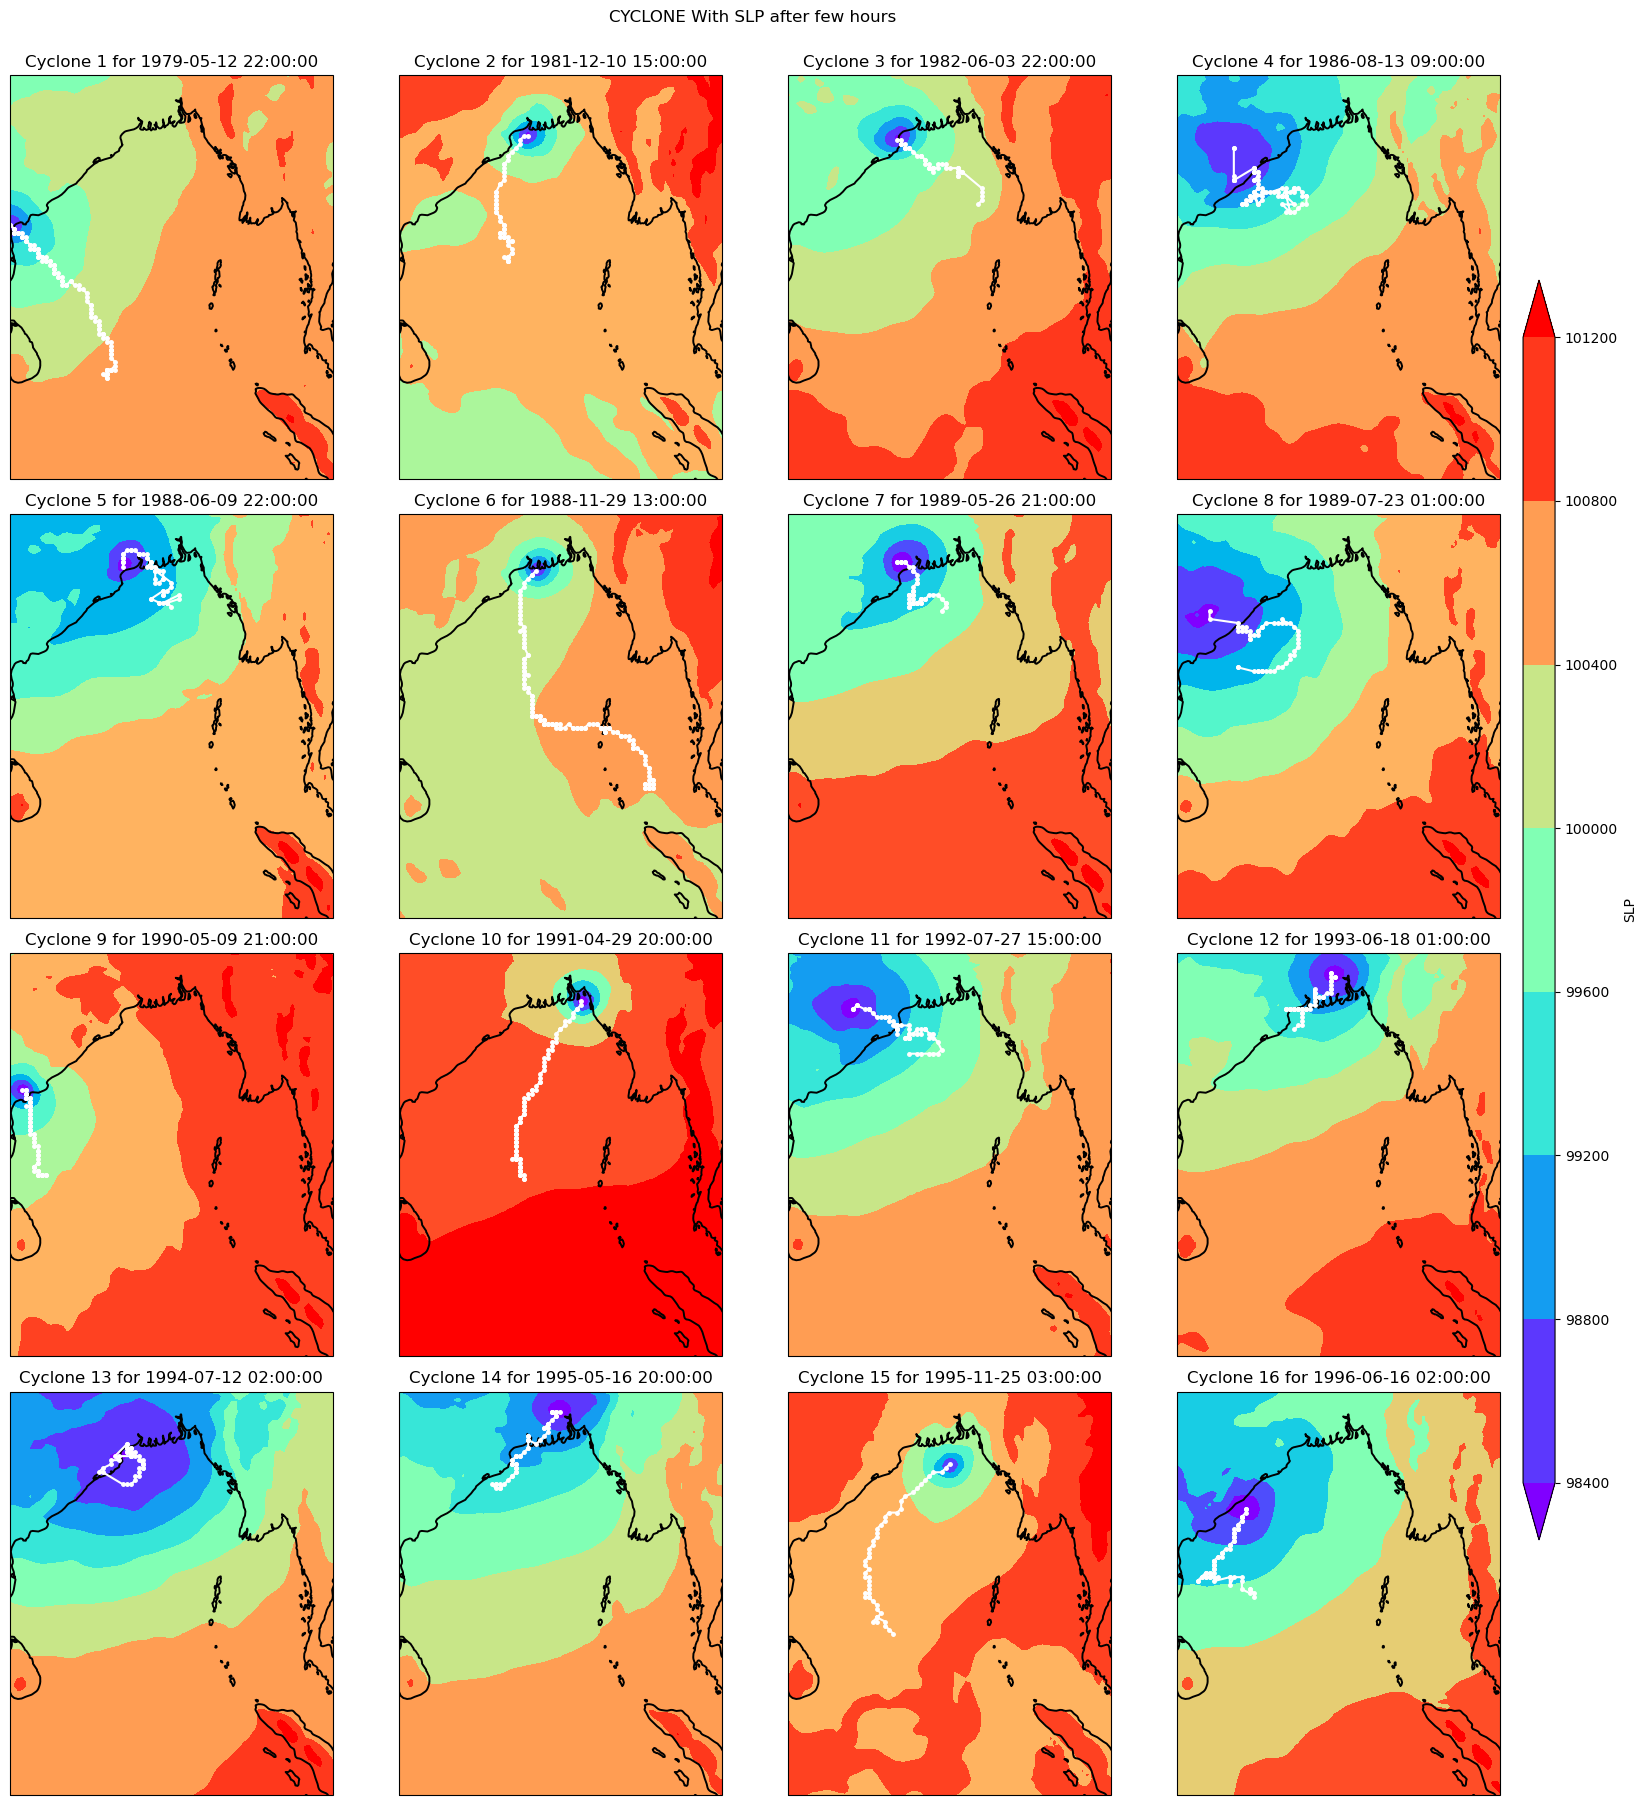

In [25]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(4, 4, figsize=(16, 18), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

for i in range(4):
    for j in range(4):
        # Taking the cyclone number from input
        cyclone_number = i*4 + j + 1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=cyclone_data.shape[0]-1

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]

        # Date problem solved by conversion
        target_date = cyclone_data.ISO_TIME[num] #0, #-1, #halftime
        target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

        index = slp_time.index(target_cyclone_date)


        # plotting
        axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=2.5, color='white', transform=ccrs.PlateCarree())
        axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
        axs[i,j].coastlines(linewidth=1.4)
        axs[i,j].set_title(f"Cyclone {cyclone_number} for {target_date}")
        # ax.gridlines(draw_labels=True)

        # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        # Create the contourf plot
        contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
        contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])  # Define the position of the colorbar [left, bottom, width, height]

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("CYCLONE With SLP after few hours ", y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

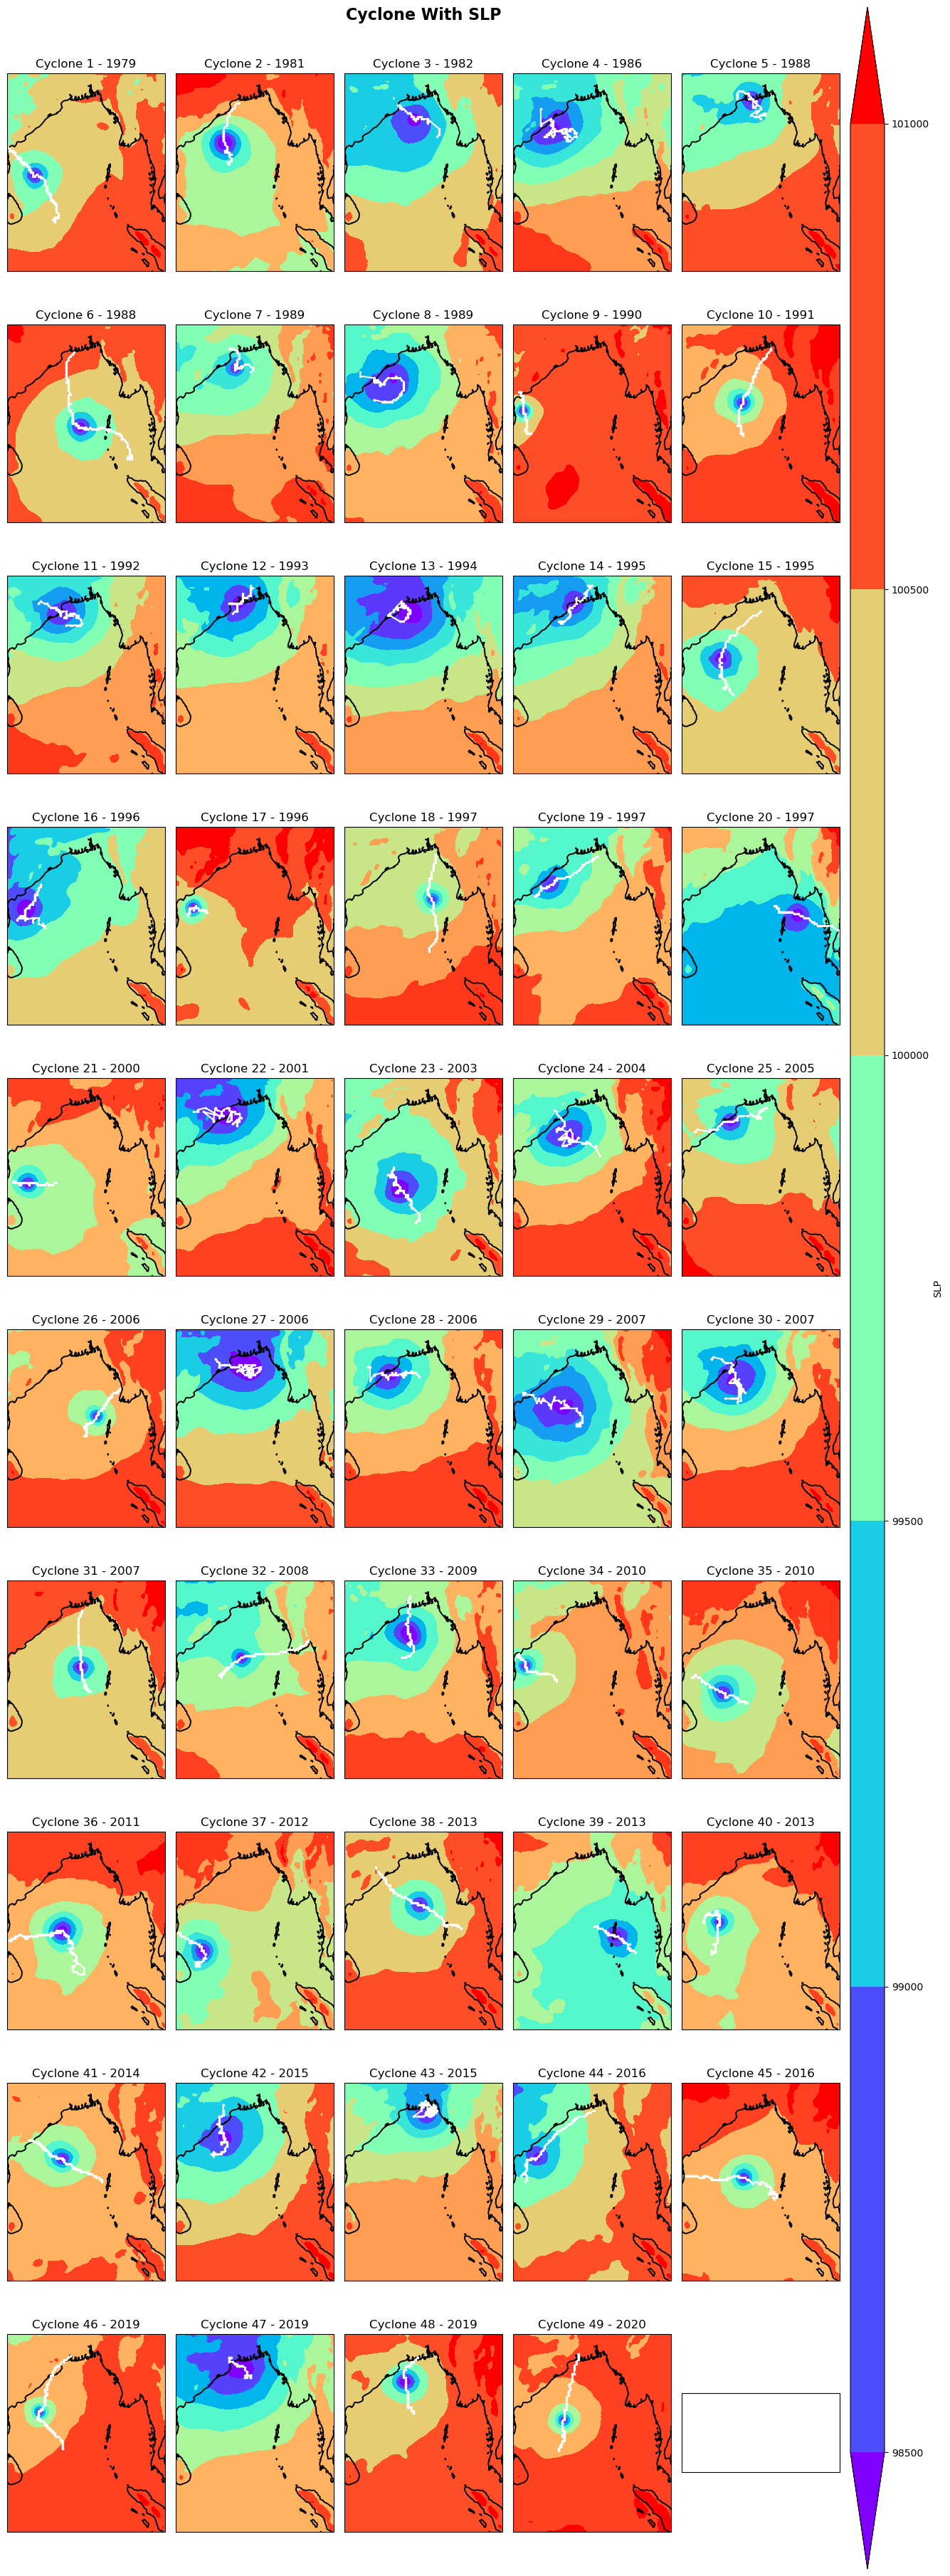

In [34]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

cyclone_number = 0

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = cyclone_number+1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=math.ceil(cyclone_data.shape[0]/2)

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]
        if not cyclone_data.empty:
            # Date problem solved by conversion
            target_date = cyclone_data.ISO_TIME[num]
            target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

            index = slp_time.index(target_cyclone_date)


            # plotting
            axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=1.5, color='white', transform=ccrs.PlateCarree())
            axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
            axs[i,j].coastlines(linewidth=1.4)
            axs[i,j].set_title(f"Cyclone {cyclone_number} - {cyclone_data.ISO_TIME[0][:4]}")
            # ax.gridlines(draw_labels=True)

            # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            # Create the contourf plot
            contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04, 1])  # Define the position of the colorbar [left, bottom, width, height][1, 0, 0.03, 1])

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("Cyclone With SLP", fontsize=16, fontweight='bold', y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

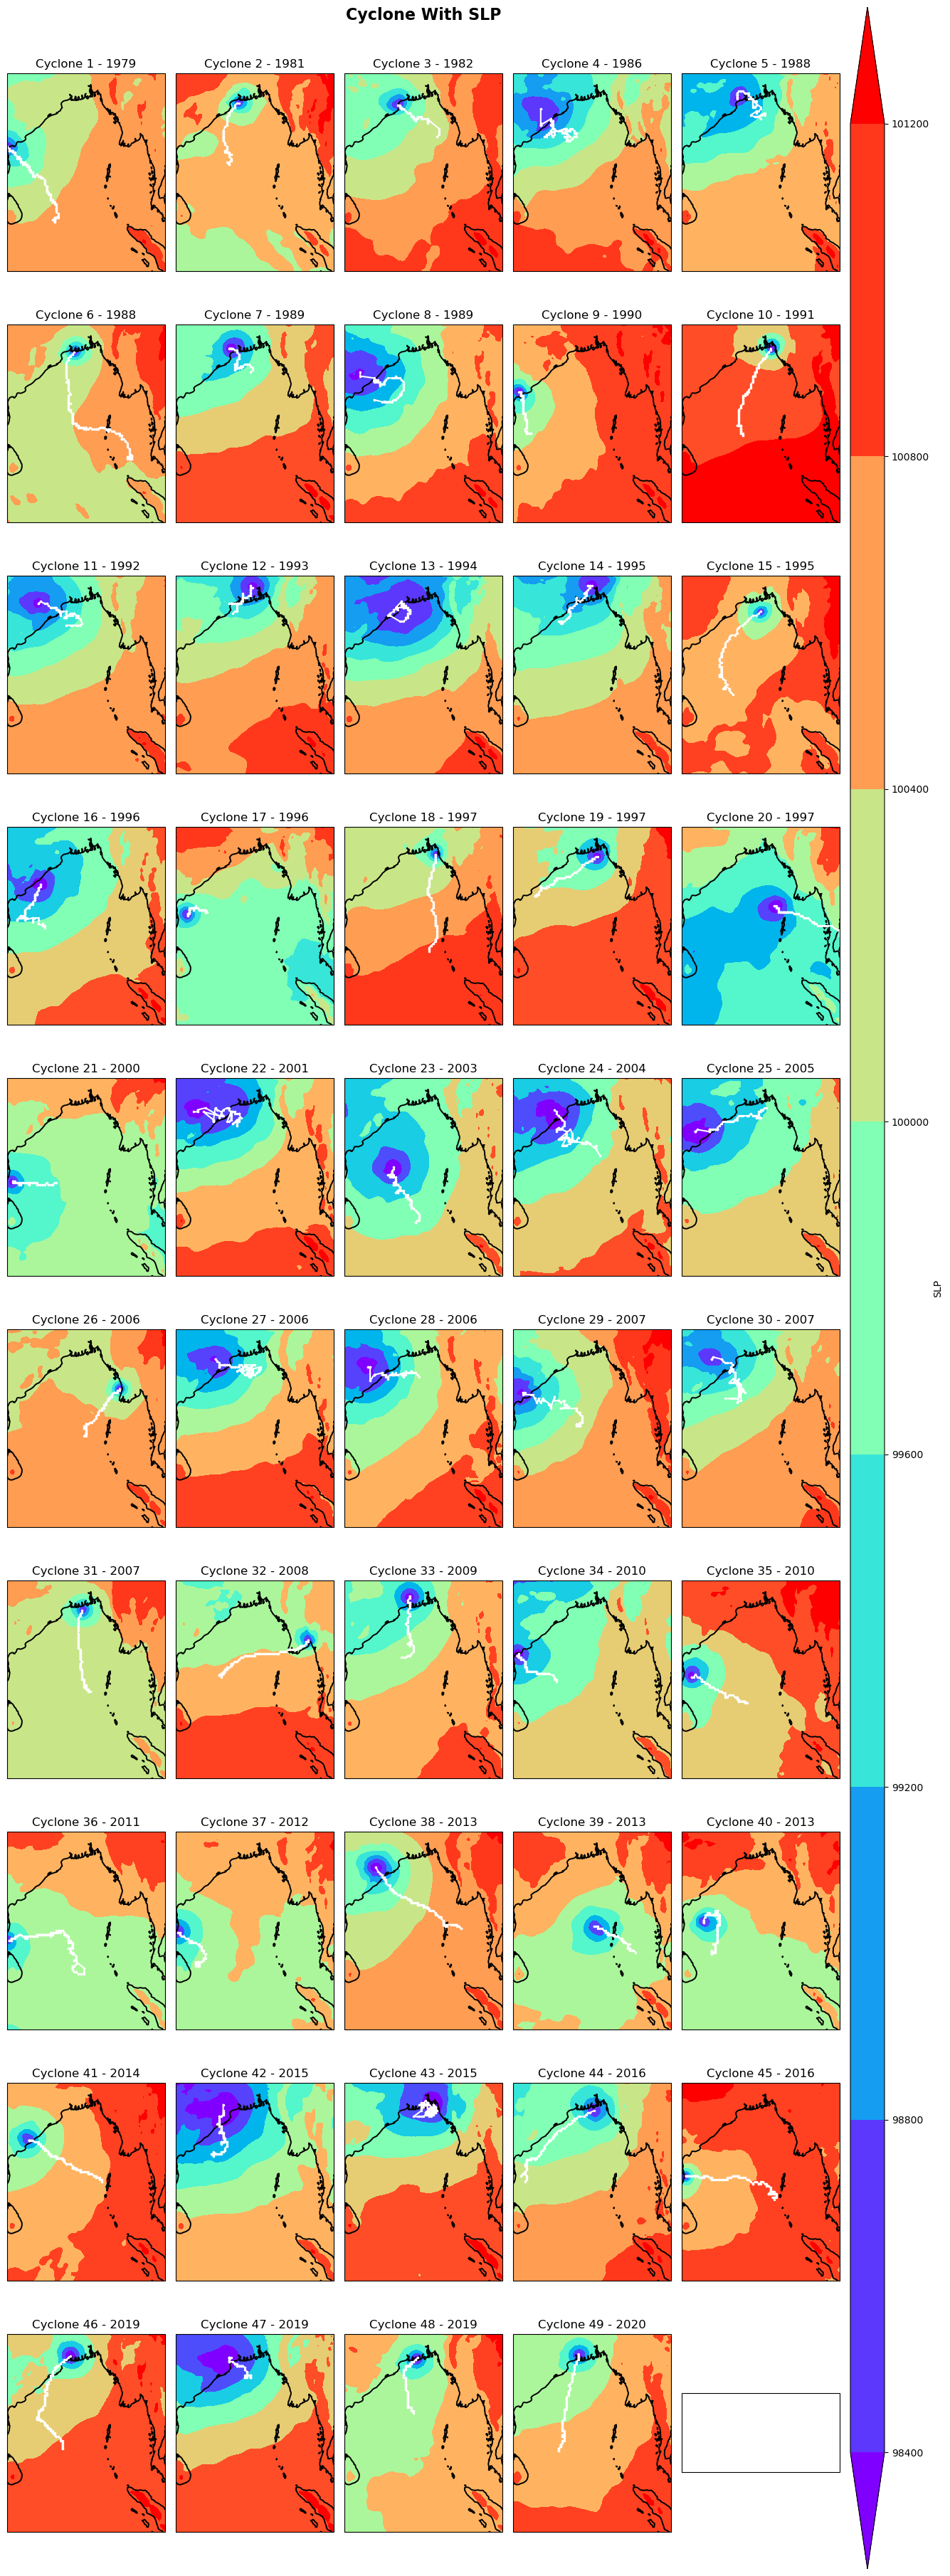

In [35]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

cyclone_number = 0

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = cyclone_number+1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=cyclone_data.shape[0]-1

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]
        if not cyclone_data.empty:
            # Date problem solved by conversion
            target_date = cyclone_data.ISO_TIME[num]
            target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

            index = slp_time.index(target_cyclone_date)


            # plotting
            axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=1.5, color='white', transform=ccrs.PlateCarree())
            axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
            axs[i,j].coastlines(linewidth=1.4)
            axs[i,j].set_title(f"Cyclone {cyclone_number} - {cyclone_data.ISO_TIME[0][:4]}")
            # ax.gridlines(draw_labels=True)

            # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            # Create the contourf plot
            contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04, 1])  # Define the position of the colorbar [left, bottom, width, height][1, 0, 0.03, 1])

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("Cyclone With SLP", fontsize=16, fontweight='bold', y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

## Cyclone Number-1

In [ ]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])

fig, axs = plt.subplots(10, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []

cyclone_number = 0

for i in range(10):
    for j in range(5):
        # Taking the cyclone number from input
        cyclone_number = cyclone_number+1

        sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
        cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
        num=cyclone_data.shape[0]-1

        # cyclone_data = cyclone[cyclone['NUMBER'] == float(cyclone_number)]
        if not cyclone_data.empty:
            # Date problem solved by conversion
            target_date = cyclone_data.ISO_TIME[num]
            target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")

            index = slp_time.index(target_cyclone_date)


            # plotting
            axs[i,j].plot(cyclone_data['lon'], cyclone_data['lat'], '-o', markersize=1.5, color='white', transform=ccrs.PlateCarree())
            axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
            axs[i,j].coastlines(linewidth=1.4)
            axs[i,j].set_title(f"Cyclone {cyclone_number} - {cyclone_data.ISO_TIME[0][:4]}")
            # ax.gridlines(draw_labels=True)

            # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            # Create the contourf plot
            contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
            contourf_objects.append(contourf)

# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04, 1])  # Define the position of the colorbar [left, bottom, width, height][1, 0, 0.03, 1])

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("Cyclone With SLP", fontsize=16, fontweight='bold', y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

In [37]:
for cyclone_number in range(1, 50):
    grouped = pre_data.groupby('NUMBER')
    specific_group = grouped.get_group(cyclone_number)
    print(f"Cyclone {cyclone_number}: Row {specific_group.shape[0]}")

Cyclone 1: Row 121
Cyclone 2: Row 65
Cyclone 3: Row 51
Cyclone 4: Row 83
Cyclone 5: Row 54
Cyclone 6: Row 161
Cyclone 7: Row 64
Cyclone 8: Row 55
Cyclone 9: Row 73
Cyclone 10: Row 91
Cyclone 11: Row 61
Cyclone 12: Row 56
Cyclone 13: Row 52
Cyclone 14: Row 59
Cyclone 15: Row 53
Cyclone 16: Row 77
Cyclone 17: Row 64
Cyclone 18: Row 79
Cyclone 19: Row 70
Cyclone 20: Row 54
Cyclone 21: Row 51
Cyclone 22: Row 56
Cyclone 23: Row 89
Cyclone 24: Row 63
Cyclone 25: Row 72
Cyclone 26: Row 73
Cyclone 27: Row 92
Cyclone 28: Row 66
Cyclone 29: Row 56
Cyclone 30: Row 67
Cyclone 31: Row 83
Cyclone 32: Row 122
Cyclone 33: Row 58
Cyclone 34: Row 62
Cyclone 35: Row 54
Cyclone 36: Row 129
Cyclone 37: Row 49
Cyclone 38: Row 114
Cyclone 39: Row 53
Cyclone 40: Row 117
Cyclone 41: Row 106
Cyclone 42: Row 91
Cyclone 43: Row 102
Cyclone 44: Row 79
Cyclone 45: Row 111
Cyclone 46: Row 104
Cyclone 47: Row 54
Cyclone 48: Row 69
Cyclone 49: Row 101


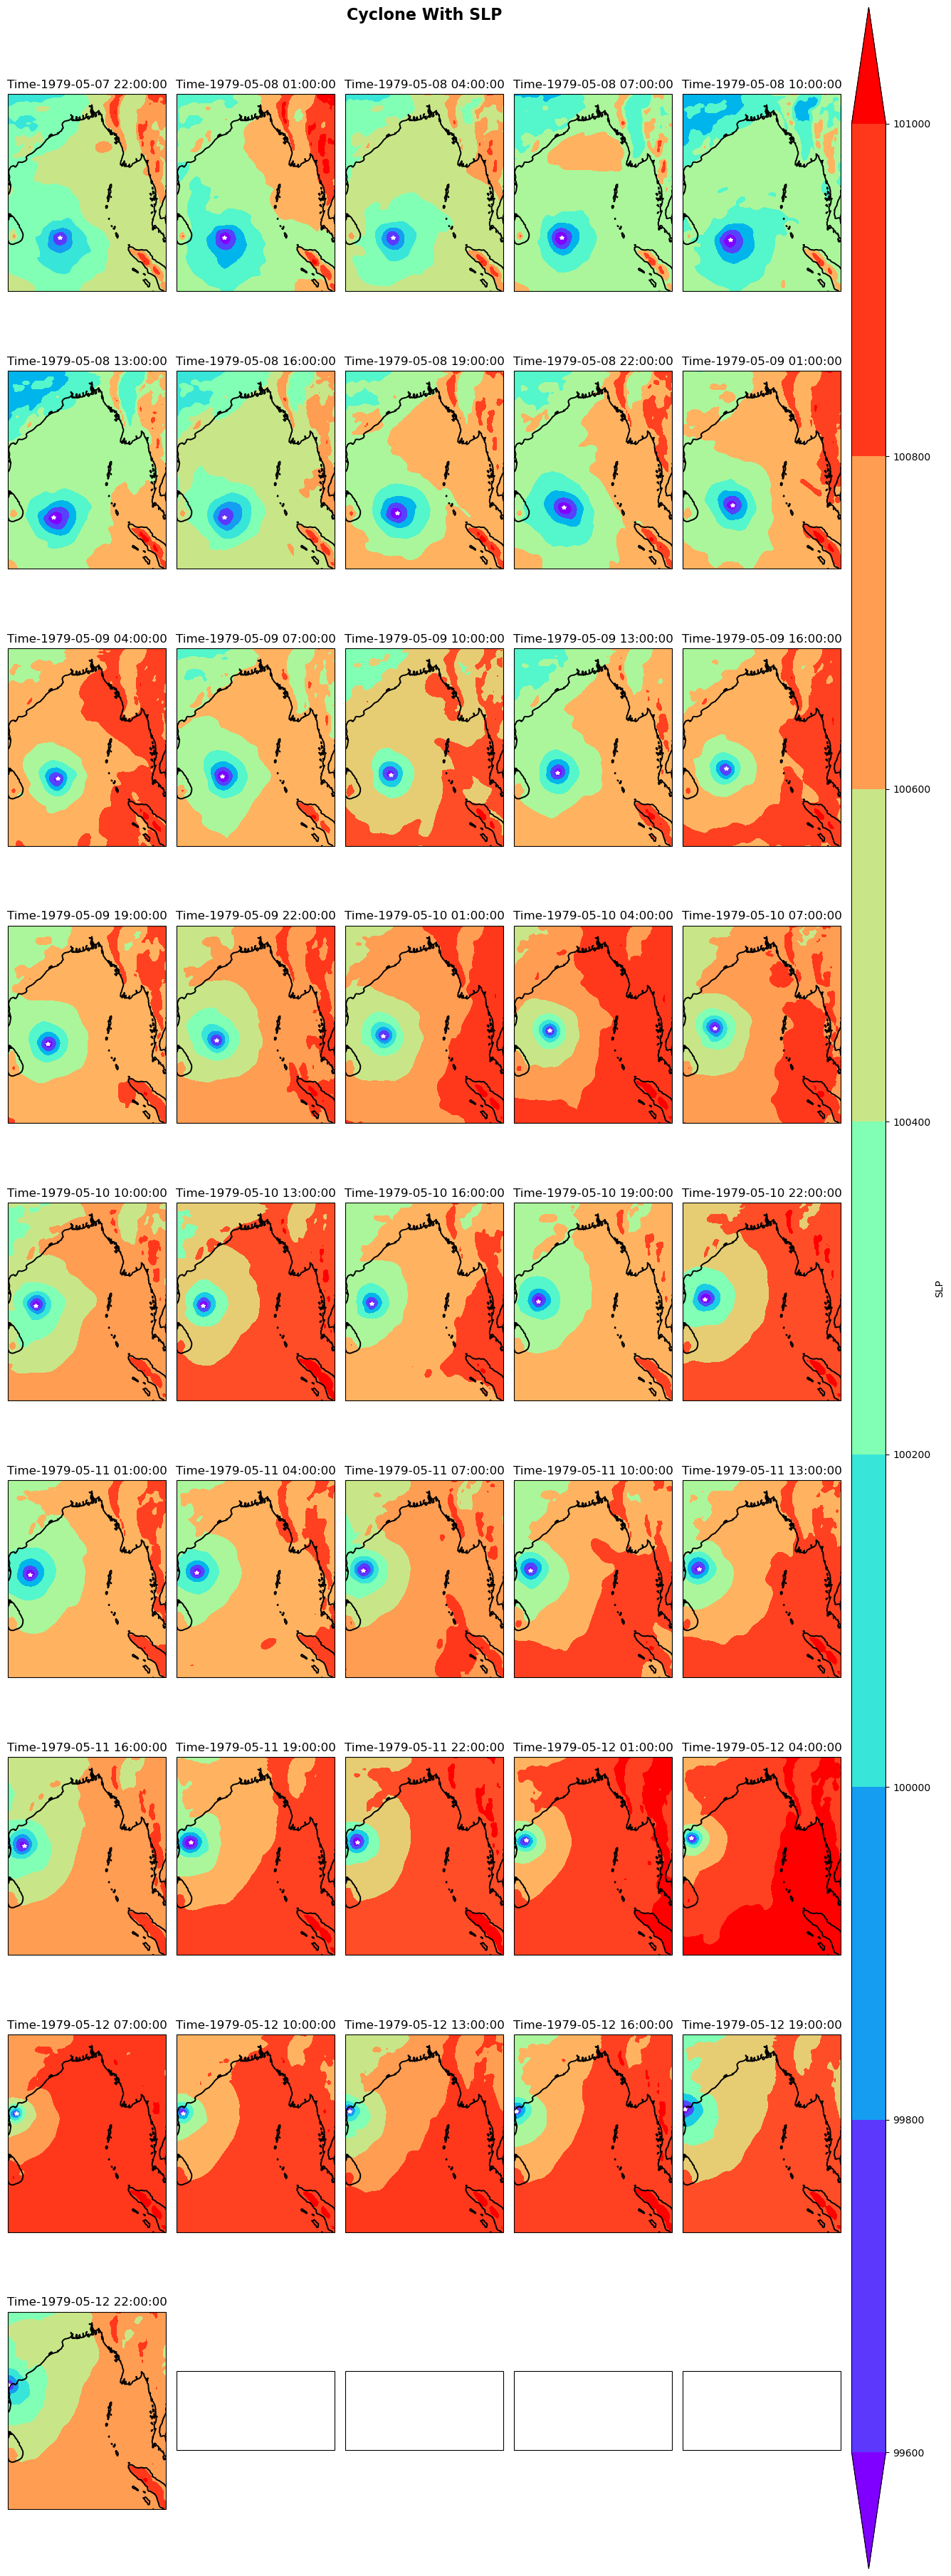

In [77]:
slp_time = []
for k in range(len(slp_data.time)):
    slp_time.append(str(slp_data.time[k])[36:49])
    
# fig, axs = plt.subplots(10, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})
# levels=np.arange(100100, 102100, 100)
contourf_objects = []
cyclone_number = 1
sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
time_stamps=cyclone_data.ISO_TIME.to_list()
row=math.ceil((len(time_stamps)/3)/5)
fig, axs = plt.subplots(row, 5, figsize=(12, 36), dpi=100, subplot_kw={'projection': ccrs.PlateCarree()})

k=0
for i in range(row):
    for j in range(5):
#         for k in range(0, len(time_stamps), 3):

                if not cyclone_data.empty:
                    target_date = cyclone_data.ISO_TIME[k]
                    target_cyclone_date = datetime.strptime(target_date, "%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%dT%H")
                    index = slp_time.index(target_cyclone_date)
                    
            

                    axs[i,j].plot(cyclone_data.lon[k], cyclone_data.lat[k], '*', markersize=4, color='white', transform=ccrs.PlateCarree())
                    axs[i,j].set_extent([80, 100, 0, 25], crs=ccrs.PlateCarree())
                    axs[i,j].coastlines(linewidth=1.4)
                    axs[i,j].set_title(f"Time-{target_date}")
                    # ax.gridlines(draw_labels=True)
   
                    # axs[i,j].contourf(lon2d, lat2d, slp_data.msl[index,:,:], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
                    # Create the contourf plot
                    contourf = axs[i, j].contourf(lon2d, lat2d, slp_data.msl[index, :, :], cmap='rainbow', extend='both', transform=ccrs.PlateCarree())
                    contourf_objects.append(contourf)
                    k+=3
                    if k>len(time_stamps):
                        break
    if k> len(time_stamps):
        break


# Create a single colorbar for all subplots
cbar_ax = fig.add_axes([1, 0, 0.04,1])  # Define the position of the colorbar [left, bottom, width, height][1, 0, 0.03, 1])

# Add a colorbar
cbar = fig.colorbar(contourf_objects[0], cax=cbar_ax, orientation='vertical', label='SLP')

# Full title
fig.suptitle("Cyclone With SLP", fontsize=16, fontweight='bold', y=1) # MUST ADD YEAR RANGE

# Adjust spacing between subplots
fig.tight_layout()

['1979-05-07 22:00:00',
 '1979-05-07 23:00:00',
 '1979-05-08 00:00:00',
 '1979-05-08 01:00:00',
 '1979-05-08 02:00:00',
 '1979-05-08 03:00:00',
 '1979-05-08 04:00:00',
 '1979-05-08 05:00:00',
 '1979-05-08 06:00:00',
 '1979-05-08 07:00:00',
 '1979-05-08 08:00:00',
 '1979-05-08 09:00:00',
 '1979-05-08 10:00:00',
 '1979-05-08 11:00:00',
 '1979-05-08 12:00:00',
 '1979-05-08 13:00:00',
 '1979-05-08 14:00:00',
 '1979-05-08 15:00:00',
 '1979-05-08 16:00:00',
 '1979-05-08 17:00:00',
 '1979-05-08 18:00:00',
 '1979-05-08 19:00:00',
 '1979-05-08 20:00:00',
 '1979-05-08 21:00:00',
 '1979-05-08 22:00:00',
 '1979-05-08 23:00:00',
 '1979-05-09 00:00:00',
 '1979-05-09 01:00:00',
 '1979-05-09 02:00:00',
 '1979-05-09 03:00:00',
 '1979-05-09 04:00:00',
 '1979-05-09 05:00:00',
 '1979-05-09 06:00:00',
 '1979-05-09 07:00:00',
 '1979-05-09 08:00:00',
 '1979-05-09 09:00:00',
 '1979-05-09 10:00:00',
 '1979-05-09 11:00:00',
 '1979-05-09 12:00:00',
 '1979-05-09 13:00:00',
 '1979-05-09 14:00:00',
 '1979-05-09 15:

In [78]:
cyclone_number = 1
sin_cyc = pre_data[pre_data['NUMBER'] == cyclone_number]
cyclone_data = sin_cyc[['NUMBER', 'ISO_TIME', 'lat', 'lon']].reset_index()
time_stamps=cyclone_data.ISO_TIME.to_list()
row=math.ceil((len(time_stamps)/3)/5)
# print(row)
for i in range(0, len(time_stamps), 3):
    if not cyclone_data.empty:
        target_date = cyclone_data.ISO_TIME[i]
        print(time_stamps[i],target_date)
            
    
    
    

1979-05-07 22:00:00 1979-05-07 22:00:00
1979-05-08 01:00:00 1979-05-08 01:00:00
1979-05-08 04:00:00 1979-05-08 04:00:00
1979-05-08 07:00:00 1979-05-08 07:00:00
1979-05-08 10:00:00 1979-05-08 10:00:00
1979-05-08 13:00:00 1979-05-08 13:00:00
1979-05-08 16:00:00 1979-05-08 16:00:00
1979-05-08 19:00:00 1979-05-08 19:00:00
1979-05-08 22:00:00 1979-05-08 22:00:00
1979-05-09 01:00:00 1979-05-09 01:00:00
1979-05-09 04:00:00 1979-05-09 04:00:00
1979-05-09 07:00:00 1979-05-09 07:00:00
1979-05-09 10:00:00 1979-05-09 10:00:00
1979-05-09 13:00:00 1979-05-09 13:00:00
1979-05-09 16:00:00 1979-05-09 16:00:00
1979-05-09 19:00:00 1979-05-09 19:00:00
1979-05-09 22:00:00 1979-05-09 22:00:00
1979-05-10 01:00:00 1979-05-10 01:00:00
1979-05-10 04:00:00 1979-05-10 04:00:00
1979-05-10 07:00:00 1979-05-10 07:00:00
1979-05-10 10:00:00 1979-05-10 10:00:00
1979-05-10 13:00:00 1979-05-10 13:00:00
1979-05-10 16:00:00 1979-05-10 16:00:00
1979-05-10 19:00:00 1979-05-10 19:00:00
1979-05-10 22:00:00 1979-05-10 22:00:00


In [56]:
for i in range(0, len(time_stamps), 3):
    if not cyclone_data.empty:
        target_date = cyclone_data.ISO_TIME[i]
        print(time_stamps[i],target_date,cyclone_data.lon[i],cyclone_data.lat[i])

1979-05-07 22:00:00 1979-05-07 22:00:00 86.5 6.75
1979-05-08 01:00:00 1979-05-08 01:00:00 86.0 6.75
1979-05-08 04:00:00 1979-05-08 04:00:00 86.0 6.75
1979-05-08 07:00:00 1979-05-08 07:00:00 86.0 6.75
1979-05-08 10:00:00 1979-05-08 10:00:00 86.0 6.5
1979-05-08 13:00:00 1979-05-08 13:00:00 85.75 6.5
1979-05-08 16:00:00 1979-05-08 16:00:00 86.0 6.5
1979-05-08 19:00:00 1979-05-08 19:00:00 86.5 7.0
1979-05-08 22:00:00 1979-05-08 22:00:00 86.25 7.75
1979-05-09 01:00:00 1979-05-09 01:00:00 86.25 8.0
1979-05-09 04:00:00 1979-05-09 04:00:00 86.25 8.5
1979-05-09 07:00:00 1979-05-09 07:00:00 85.75 8.75
1979-05-09 10:00:00 1979-05-09 10:00:00 85.75 9.0
1979-05-09 13:00:00 1979-05-09 13:00:00 85.5 9.25
1979-05-09 16:00:00 1979-05-09 16:00:00 85.5 9.75
1979-05-09 19:00:00 1979-05-09 19:00:00 85.0 10.0
1979-05-09 22:00:00 1979-05-09 22:00:00 85.0 10.5
1979-05-10 01:00:00 1979-05-10 01:00:00 84.75 11.0
1979-05-10 04:00:00 1979-05-10 04:00:00 84.5 11.75
1979-05-10 07:00:00 1979-05-10 07:00:00 84.0 12.0

In [70]:
a=range(0, len(time_stamps), 3).to_list
print(a)

AttributeError: 'range' object has no attribute 'to_list'

In [73]:
k = 0  # Initialize k

for i in range(5):
    for j in range(5):
        print(k)
        k += 3 

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
